In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("../DATA/mouse_viral_study.csv")

In [3]:
df.head()

,Med_1_mL,Med_2_mL,Virus Present
0,6.508231,8.582531,0
1,4.126116,3.073459,1
2,6.427870,6.369758,0
3,3.672953,4.905215,1
4,1.580321,2.440562,1


In [4]:
df.columns

Index(['Med_1_mL', 'Med_2_mL', 'Virus Present'], dtype='object')

<AxesSubplot:xlabel='Med_1_mL', ylabel='Med_2_mL'>

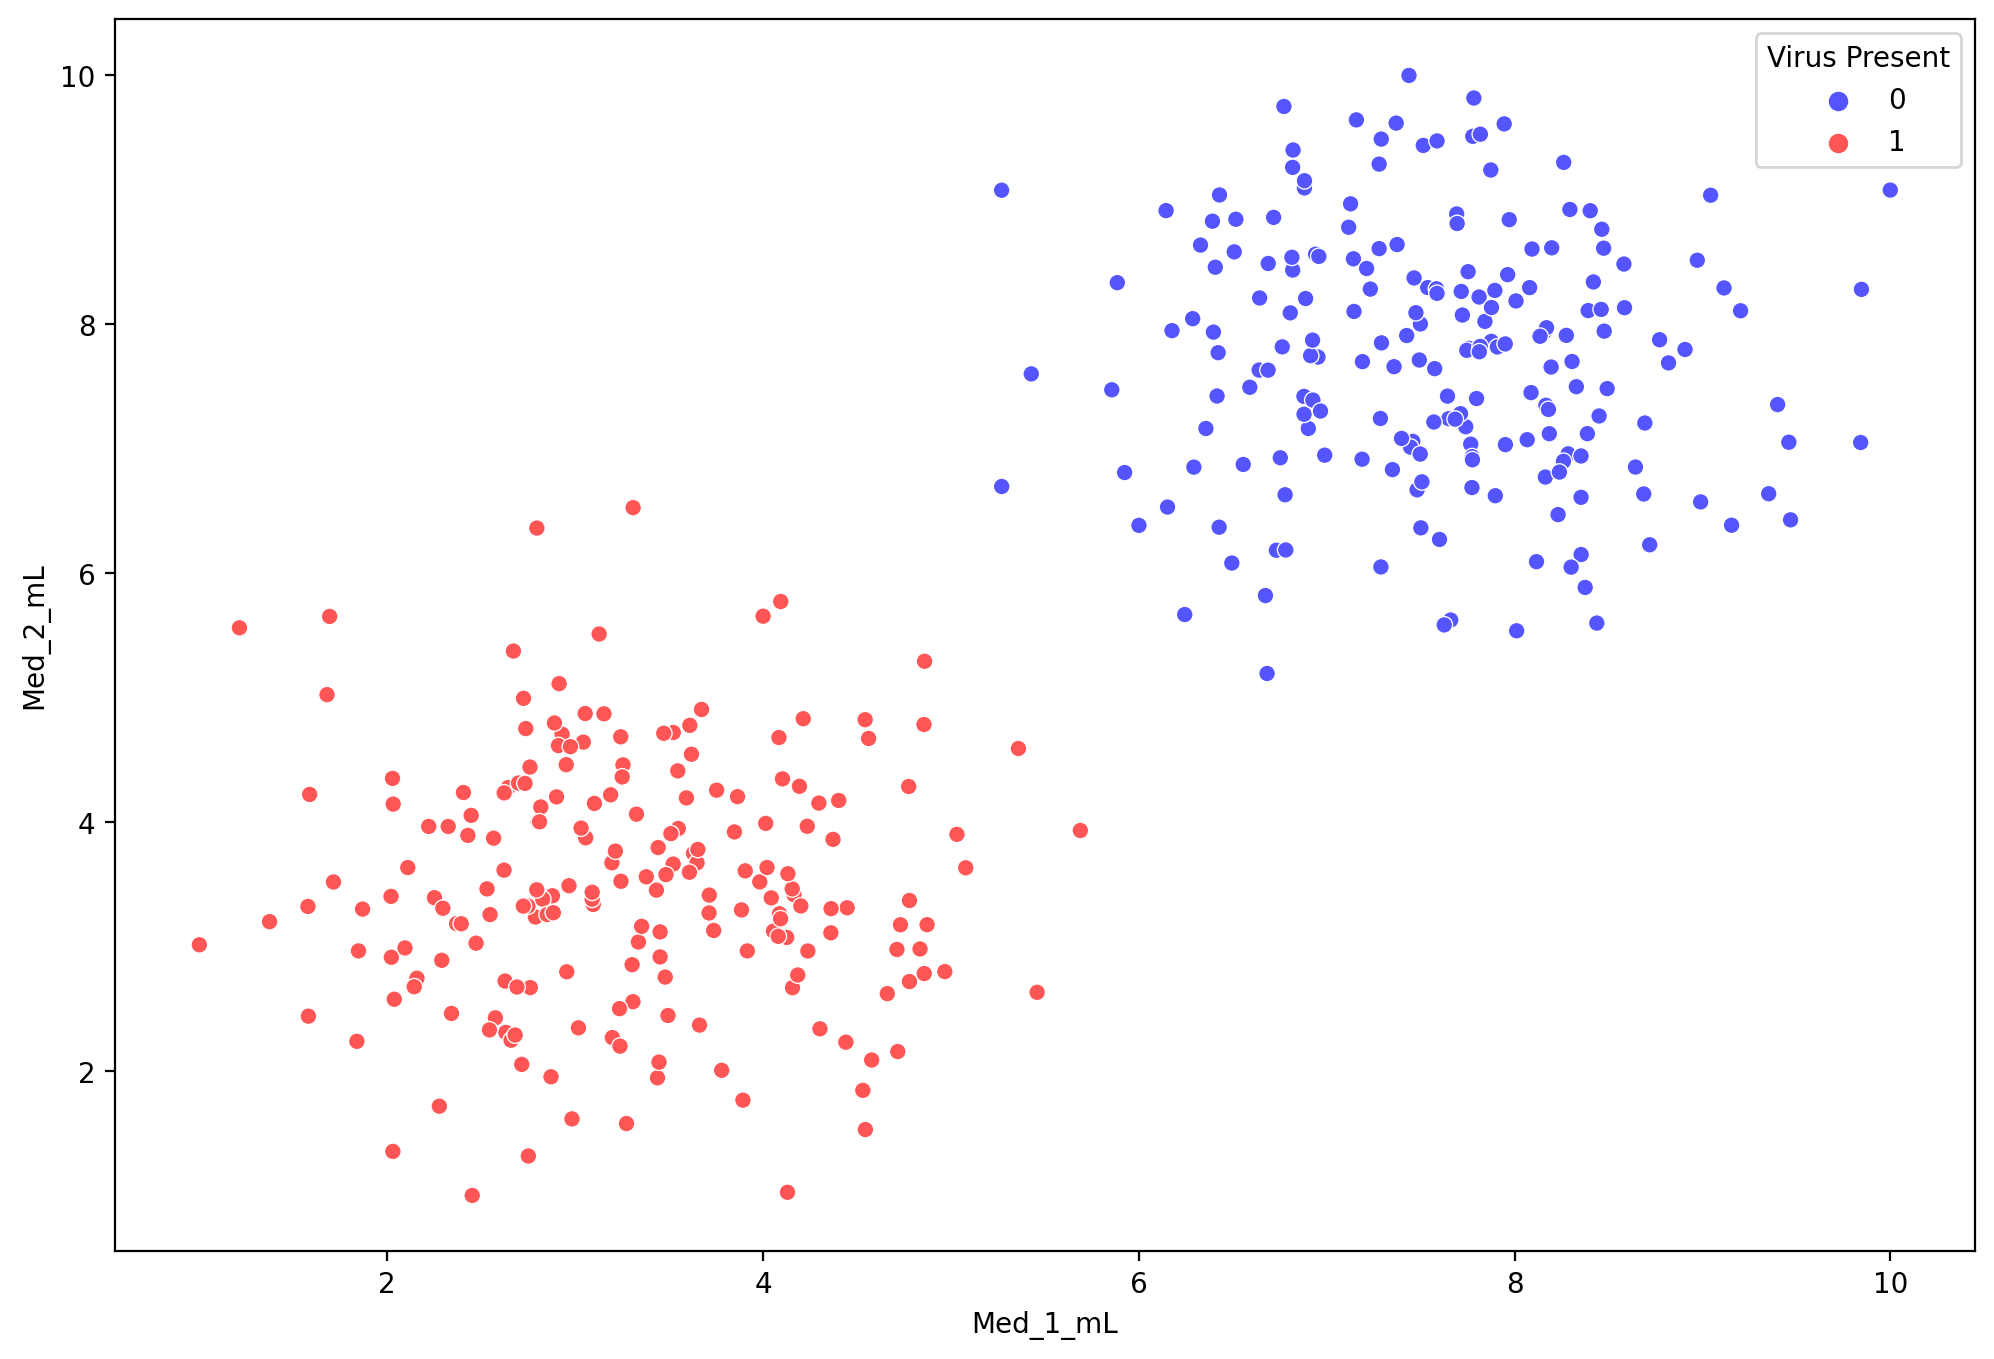

In [9]:
plt.figure(figsize=(12,8), dpi=200)
sns.scatterplot(x='Med_1_mL',y='Med_2_mL',hue='Virus Present',data=df,palette='seismic')

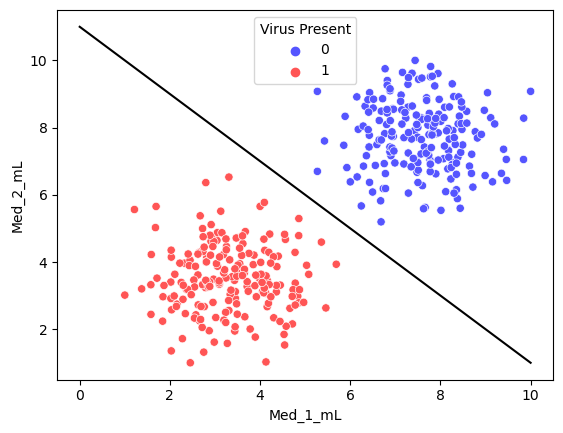

In [10]:
sns.scatterplot(x='Med_1_mL',y='Med_2_mL',hue='Virus Present',palette='seismic',data=df)

# автоматически созданная разделяющая гиперплоскость (в двумерном случае - линия)

x = np.linspace(0,10,100)
m = -1
b = 11
y = m*x + b
plt.plot(x,y,'k')

In [11]:
from sklearn.svm import SVC

In [12]:
X = df.drop('Virus Present',axis=1)
y = df['Virus Present']

In [13]:
# kernel важный параметр
model = SVC(kernel='linear', C=1000)
model.fit(X, y)

SVC(C=1000, kernel='linear')

In [14]:
from svm_margin_plot import plot_svm_boundary

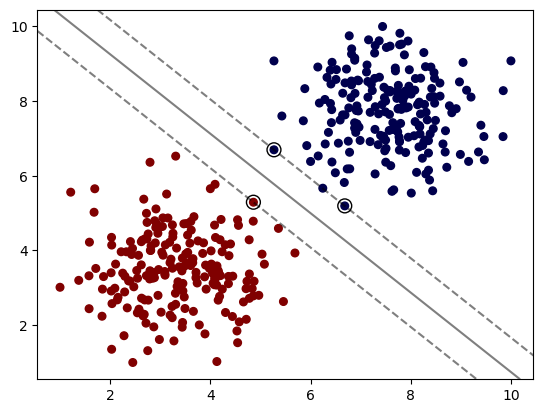

In [15]:
plot_svm_boundary(model,X,y)

In [23]:
model = SVC(kernel='linear', C=0.05)
model.fit(X, y)

SVC(C=0.05, kernel='linear')

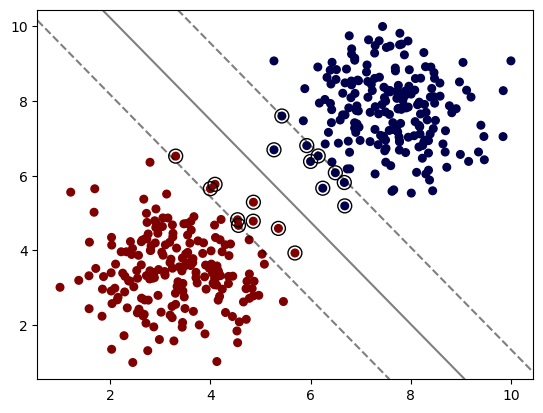

In [24]:
plot_svm_boundary(model,X,y)

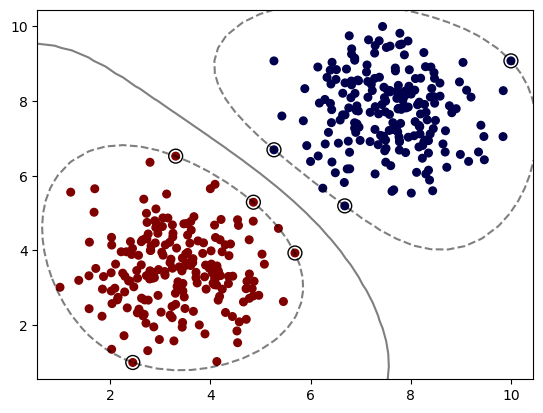

In [20]:
model = SVC(kernel='rbf', C=100)
model.fit(X, y)
plot_svm_boundary(model,X,y)

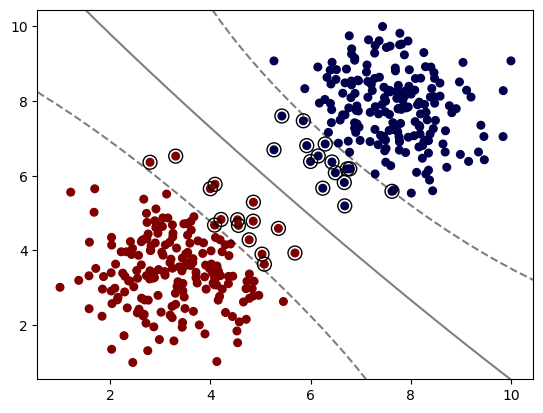

In [35]:
# gamma позволяет влиять на шумы(модель может стать более чувствительной если значение поставить 'auto')
# auto по умолчанию 0.5(1 / (количество признаков)) и при увеличении зазор больше повторяет изгибы для оп. векторов
# если gamma слишком высокая, то модель получается переобученной
# по умолчанию gamma='scale'
model = SVC(kernel='rbf', C=1, gamma=0.01)
model.fit(X, y)
plot_svm_boundary(model,X,y)

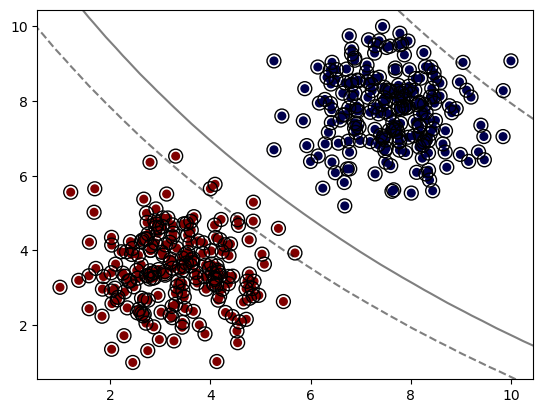

In [31]:
model = SVC(kernel='sigmoid')
model.fit(X, y)
plot_svm_boundary(model,X,y)

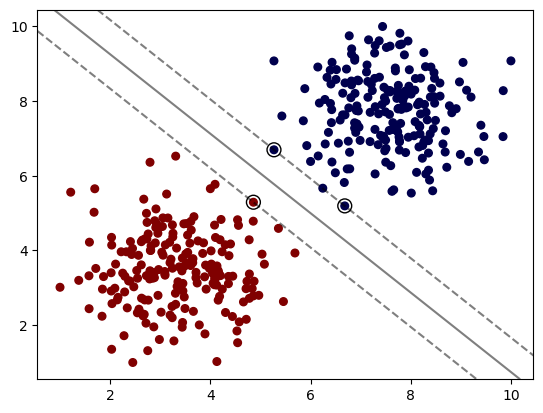

In [33]:
# degree - степень полинома
model = SVC(kernel='poly', C=100,degree=1)
model.fit(X, y)
plot_svm_boundary(model,X,y)

### Поиск по сетке

In [36]:
from sklearn.model_selection import GridSearchCV

In [37]:
svm = SVC()
param_grid = {'C':[0.01,0.1,1],'kernel':['linear','rbf']}
grid = GridSearchCV(svm,param_grid)

In [38]:
grid.fit(X,y)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.01, 0.1, 1], 'kernel': ['linear', 'rbf']})

In [39]:
grid.best_score_

1.0

In [40]:
grid.best_params_

{'C': 0.01, 'kernel': 'linear'}